#Topic Classification

Baseline parameter:


*   TF-IDF
*   Logistic Regression



## Preprocess

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('gdrive/MyDrive/save_file/20220214/data_processed_20220214.csv')

In [4]:
df

,review_id,review,rating,created_date,review_processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,gp:AOqpTOGQsjNT8bCwiF-nwRWz21cSlw0vCqBA6BlDSlN...,Toko belanja online yang begitu memuaskan...,5,2020-11-01 00:00:58+00:00,toko belanja online,0,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['toko', 'belanja', 'online']"
1,gp:AOqpTOFJ-fitPKGHlserqpT5G9aj99zuciR3nWrBIl-...,"Tidak puas, karena beli power bank 16000mah ku...",3,2020-11-01 00:05:23+00:00,beli power bank kualitas pdhl ngecas hp penuh ...,1,2.0,0.8722,"aplikasi, bayar, tolong, akun, iklan, pakai, t...","['beli', 'power', 'bank', 'kualitas', 'pdhl', ..."
2,gp:AOqpTOGXwzNkjNd7DXVTBPQZMfmfDn0XUpCjkwwNspA...,Kerennn ga bikin ribet,5,2020-11-01 00:05:38+00:00,kerennn bikin ribet,2,1.0,0.9901,"ongkir, gratis, belanja, pakai, bintang, promo...","['kerennn', 'bikin', 'ribet']"
3,gp:AOqpTOE7aFosjNF6RFfC1UwhOb3GGNWoYi5RzBysn6-...,aplikasi belanja online yg mantap..������,5,2020-11-01 00:12:00+00:00,aplikasi belanja online,3,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['aplikasi', 'belanja', 'online']"
4,gp:AOqpTOH-VArcOLh-i_YhEdvhtx1C0GHOQHYA2sLVdjo...,jadi tambah lebih mudah belanja dengan tokopedia,5,2020-11-01 00:12:49+00:00,mudah belanja,4,3.0,0.9853,"belanja, aplikasi, mudah, bantu, online, sukse...","['mudah', 'belanja']"
...,...,...,...,...,...,...,...,...,...,...
755874,gp:AOqpTOGPoYnGeF8zfN6YgxDiKKgUSl7qnv0KwrLIKLs...,Aplikasimya bagusss banget suka,5,2021-12-09 13:03:26+00:00,aplikasimya bagusss,755874,1.0,0.9712,"ongkir, gratis, belanja, pakai, bintang, promo...","['aplikasimya', 'bagusss']"
755875,gp:AOqpTOGG20kk2t8jP_4IHYCRW0BoDKR9FjQRS2JPNgJ...,Produk import asli Hoki Untung,5,2021-12-09 13:09:00+00:00,produk import asli hoki untung,755875,0.0,0.9901,"barang, kirim, cepat, murah, belanja, sesuai, ...","['produk', 'import', 'asli', 'hoki', 'untung']"
755876,gp:AOqpTOEBo6yR4EBVFYLvEV3ssKrxnQ9cFrsUGyAJu46...,Sangat membantu untuk berbelanja online,5,2021-12-09 14:33:29+00:00,bantu belanja online,755876,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['bantu', 'belanja', 'online']"
755877,gp:AOqpTOE_G8UoxNZi1Y-h3C3woka8dLgeBq2OWL548sj...,"Bagus bgt, bisa belanja tanpa keluar rumah, co...",5,2021-12-10 01:40:18+00:00,belanja rumah cocok kaum mageran,755877,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['belanja', 'rumah', 'cocok', 'kaum', 'mageran']"


In [5]:
formalization_indo = {
    "@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "ahaha": "haha", "aj": "saja", "ajep-ajep": "disko", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa", "apasih": "apa", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "palsu", "ato": "atau", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bangedh": "banget", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "beli", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "benar", "bodor": "lucu", "bokap": "ayah", "bokis": "bohong", "boljug": "boleh", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong", "bubbu": "tidur", "bubu": "tidur", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "ce": "cewek", "cekal": "cegah", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmpur": "campur", "cong": "banci", "cowwyy": "maaf", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cups": "culun", "curanmor": "pencurian", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "hancur", "dimaafin": "maaf", "dimintak": "minta", "disono": "sana", "dket": "dekat", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dtg": "datang", "duren": "durian", "ed": "edisi", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fyi": "informasi", "gag": "tidak", "gan": "juragan", "gawe": "kerja", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "githu": "gitu", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "gretongan": "gratis", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hr": "hari", "hrus": "harus", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "benci", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamuwh": "kamu", "karna": "karena", "katrok": "kampungan", "kayanya": "seperti", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kekeuh": "bersikeras", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "ketrima": "terima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lemot", "louph": "cinta", "low": "kalau", "lp": "lupa", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "maho": "homo", "maksain": "maksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat", "mgu": "minggu", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mulu": "melulu", "mumpung": "selagi", "musti": "mesti", "muupz": "maaf", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "ngaku": "mengaku", "ngambil": "mengambil", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "beri", "ngebandel": "bandel", "ngegosip": "gosip", "ngeklaim": "klaim", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "rampok", "ngga": "tidak", "ngibul": "bohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "cari", "ngurus": "urus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "ntar": "nanti", "ntn": "nonton", "numpuk": "tumpuk", "nutupin": "tutup", "nyari": "cari", "nyekar": "menyekar", "nyicil": "cicil", "nyoblos": "coblos", "nyokap": "ibu", "ol": "online", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pd": "pada", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pisan": "sangat", "pk": "pakai", "plg": "paling", "pmrnth": "pemerintah", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "re": "balas", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruz": "terus", "saia": "saya", "sampe": "sampai", "sapose": "siapa", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sempet": "sempat", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "siramin": "siram", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri",  "songong": "sombong", "sory": "maaf", "sotoy": "tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "telat": "terlambat", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thn": "tahun", "tilang": "bukti pelanggaran", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "w/": "dengan", "wat": "buat", "wkt": "waktu", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yg": "yang", "yo": "iya", "yup": "iya", "7an": "tujuan", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "akko": "aku", "akku": "aku", "akyu": "aku", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "segera", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bales": "balas", "bangkotan": "tua", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "bet": "banget", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bpk": "bapak", "brngkt": "berangkat", "brp": "berapa", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cape": "capek", "caur": "jelek", "cemplungin": "masuk", "ceper": "pendek", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gretong": "gratis", "gt": "begitu", "gue": "saya", "haghaghag": "tertawa", "hakhak": "tertawa", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "huft": "mengeluh", "humas": "hubungan masyarakat", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jwb": "jawab", "ka": "kakak", "kacian": "kasihan", "kaga": "tidak", "kaka": "kakak", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kek": "seperti", "keknya": "seperti", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "penasaran", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "bersikeras", "khan": "kan", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lbur": "libur", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maen": "main", "mak": "ibu", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "mksd": "maksud", "mls": "malas", "mnt": "minta",  "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "muahal": "mahal", "mumet": "pusing", "muna": "munafik", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "naq": "anak", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngantri": "antri", "ngaruh": "pengaruh", "ngawur": "sembarangan", "ngeceng": "kumpul", "ngeh": "sadar", "ngekos": "kos", "ngelamar": "lamar", "ngeliat": "lihat", "ngemeng": "bicara", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "bicara", "ngumpul": "kumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "cari", "nyiapin": "siap", "nyiram": "siram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "sni": "sini", "sorry": "maaf", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "tengok": "jenguk", "terbitin": "terbit", "tgl": "tanggal", "thd": "terhadap", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "tp": "tapi", "trgntg": "tergantung", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "apk": "aplikasi", "dg" : "dengan", "blanja": "belanja", "sukaa": "suka", "cpt": "cepat", "bwrtransaksi": "transaksi", "realpict": "asli", "moga": "semoga", "muas": "puas", "ori": "asli", "ongkirnya": "ongkir", "turunin": "turun", "orii": "asli", "original": "asli", "hargax": "harga", "mehong": "mahal", "kainx": "kain", "rb": "ribu", "shopping": "belanja", "made": "buat", "easier": "mudah", "ways": "cara", "pay": "bayar", "applikasi": "aplikasi", "kwalitas": "kualitas", "good": "bagus", "ngechat": "chat", "ngobrol": "bicara", "ngertiin": "mengerti", "protol": "lepas", "balikin": "balik", "trx": "transaksi", "nyebelin": "sebal", "trf": "transfer", "ngebantuin": "bantu", "org": "orang", "peribet": "ribet", "fedback": "feedback", "koment": "komentar", "takuuut": "takut", "ketipuuuuh": "tipu", "register": "daftar", "hp": "handphone", "org": "orang", "instal": "install", "skarng": "sekarang", "true": "benar", "story": "cerita", "payment": "bayar", "confirm": "konfirmasi", "batalin": "batal", "ig": "instagram", "pelyanan": "layanan", "after": "setelah", "nunggu": "tunggu", "blom": "belum", "reffund": "refund", "jeleeeekkk": "jelek", "make": "pakai", "nyoba": "coba", "pantesan": "pantas", "slow": "lambat", "skrg": "sekarang", "dibalikin": "balik", "transver": "transfer", "pantes": "pantas", "staffnya": "staff", "divalidasi": "validasi", "smpe": "sampai", "pelayananya": "layanan", "komennya": "komentar", "komplin": "komplain", "complaint": "komplain", "hpus": "hapus", "muaaahal": "mahal", "masukkk": "masuk", "tlg": "tolong", "wa": "whatsapp", "luama": "lama", "stokmya": "stok", "ready": "siap", "setrlah": "setelah", "sprt": "seperti", "cs": "customer service", "direspon": "respon","prcuma": "percuma", "bkin": "bikin", "app": "aplikasi", "hape": "handphone", "karti": "kartu",  "apps": "aplikasi", "responnya": "respon", "mahalllll": "mahal", "balesan": "balas", "paswordnya": "password", "masul": "masuk", "ksong": "kosong", "nyarinya": "cari", "kluarnya": "keluar", "system": "sistem", "systemnya": "sistem", "chatt": "chat", "kridit": "kredit", "pelayananya": "layanan", "kwalitasnya": "kualitas","mantap": "bagus", "produck": "produk", "baharu": "baru", "slalu": "selalu", "dwnld": "unduh", "download": "unduh", "sndri":  "sendiri", "batalin": "batal", "mbingungin": "bingung", "vocer": "voucher", "boong": "bohong", "apus": "hapus", "sori": "maaf", "tf": "transfer", "apknya": "aplikasi", "diem": "diam", "dtang": "datang", "bukak": "buka", "boong": "bohong", "setiyap": "setiap", "sukak": "suka", "ngincer": "incar", "store": "toko", "fiturnya": "fitur", "apkx": "aplikasi", "voucherx": "voucher", "hub": "hubungi", "payaaaaaaaahh": "payah", "apl": "aplikasi", "mamam": "makan", "luama": "lama", "lot": "lemot", "ovo": "ewallet", "gopay": "ewallet", "blipay": "ewallet", "shopeepay": "ewallet", "linkaja": "ewallet", "gosend": "kurir", "sicepat": "kurir", "jne": "kurir", "alfamart": "minimarket", "indomaret": "minimarket", "alfa": "minimarket"
}

### Formalization

In [6]:
d2 = {r'(\b){}(\b)'.format(k):r'\1{}\2'.format(v) for k,v in formalization_indo.items()}

In [7]:
df_processed = df.copy()

In [9]:
df_processed['review_formal_processed'] = df_processed['review_processed'].replace(d2, regex=True)

In [10]:
df_processed

,review_id,review,rating,created_date,review_processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,review_formal_processed
0,gp:AOqpTOGQsjNT8bCwiF-nwRWz21cSlw0vCqBA6BlDSlN...,Toko belanja online yang begitu memuaskan...,5,2020-11-01 00:00:58+00:00,toko belanja online,0,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['toko', 'belanja', 'online']",toko belanja online
1,gp:AOqpTOFJ-fitPKGHlserqpT5G9aj99zuciR3nWrBIl-...,"Tidak puas, karena beli power bank 16000mah ku...",3,2020-11-01 00:05:23+00:00,beli power bank kualitas pdhl ngecas hp penuh ...,1,2.0,0.8722,"aplikasi, bayar, tolong, akun, iklan, pakai, t...","['beli', 'power', 'bank', 'kualitas', 'pdhl', ...",beli power bank kualitas pdhl ngecas handphone...
2,gp:AOqpTOGXwzNkjNd7DXVTBPQZMfmfDn0XUpCjkwwNspA...,Kerennn ga bikin ribet,5,2020-11-01 00:05:38+00:00,kerennn bikin ribet,2,1.0,0.9901,"ongkir, gratis, belanja, pakai, bintang, promo...","['kerennn', 'bikin', 'ribet']",kerennn bikin ribet
3,gp:AOqpTOE7aFosjNF6RFfC1UwhOb3GGNWoYi5RzBysn6-...,aplikasi belanja online yg mantap..������,5,2020-11-01 00:12:00+00:00,aplikasi belanja online,3,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['aplikasi', 'belanja', 'online']",aplikasi belanja online
4,gp:AOqpTOH-VArcOLh-i_YhEdvhtx1C0GHOQHYA2sLVdjo...,jadi tambah lebih mudah belanja dengan tokopedia,5,2020-11-01 00:12:49+00:00,mudah belanja,4,3.0,0.9853,"belanja, aplikasi, mudah, bantu, online, sukse...","['mudah', 'belanja']",mudah belanja
...,...,...,...,...,...,...,...,...,...,...,...
755874,gp:AOqpTOGPoYnGeF8zfN6YgxDiKKgUSl7qnv0KwrLIKLs...,Aplikasimya bagusss banget suka,5,2021-12-09 13:03:26+00:00,aplikasimya bagusss,755874,1.0,0.9712,"ongkir, gratis, belanja, pakai, bintang, promo...","['aplikasimya', 'bagusss']",aplikasimya bagusss
755875,gp:AOqpTOGG20kk2t8jP_4IHYCRW0BoDKR9FjQRS2JPNgJ...,Produk import asli Hoki Untung,5,2021-12-09 13:09:00+00:00,produk import asli hoki untung,755875,0.0,0.9901,"barang, kirim, cepat, murah, belanja, sesuai, ...","['produk', 'import', 'asli', 'hoki', 'untung']",produk import asli hoki untung
755876,gp:AOqpTOEBo6yR4EBVFYLvEV3ssKrxnQ9cFrsUGyAJu46...,Sangat membantu untuk berbelanja online,5,2021-12-09 14:33:29+00:00,bantu belanja online,755876,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['bantu', 'belanja', 'online']",bantu belanja online
755877,gp:AOqpTOE_G8UoxNZi1Y-h3C3woka8dLgeBq2OWL548sj...,"Bagus bgt, bisa belanja tanpa keluar rumah, co...",5,2021-12-10 01:40:18+00:00,belanja rumah cocok kaum mageran,755877,3.0,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['belanja', 'rumah', 'cocok', 'kaum', 'mageran']",belanja rumah cocok kaum mageran


In [11]:
df_processed = df_processed.astype({"Dominant_Topic": int})

In [12]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755879 entries, 0 to 755878
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                755879 non-null  object 
 1   review                   755879 non-null  object 
 2   rating                   755879 non-null  int64  
 3   created_date             755879 non-null  object 
 4   review_processed         755879 non-null  object 
 5   Document_No              755879 non-null  int64  
 6   Dominant_Topic           755879 non-null  int64  
 7   Topic_Perc_Contrib       755879 non-null  float64
 8   Keywords                 755879 non-null  object 
 9   Text                     755879 non-null  object 
 10  review_formal_processed  755879 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 63.4+ MB


In [13]:
df_processed

,review_id,review,rating,created_date,review_processed,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,review_formal_processed
0,gp:AOqpTOGQsjNT8bCwiF-nwRWz21cSlw0vCqBA6BlDSlN...,Toko belanja online yang begitu memuaskan...,5,2020-11-01 00:00:58+00:00,toko belanja online,0,3,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['toko', 'belanja', 'online']",toko belanja online
1,gp:AOqpTOFJ-fitPKGHlserqpT5G9aj99zuciR3nWrBIl-...,"Tidak puas, karena beli power bank 16000mah ku...",3,2020-11-01 00:05:23+00:00,beli power bank kualitas pdhl ngecas hp penuh ...,1,2,0.8722,"aplikasi, bayar, tolong, akun, iklan, pakai, t...","['beli', 'power', 'bank', 'kualitas', 'pdhl', ...",beli power bank kualitas pdhl ngecas handphone...
2,gp:AOqpTOGXwzNkjNd7DXVTBPQZMfmfDn0XUpCjkwwNspA...,Kerennn ga bikin ribet,5,2020-11-01 00:05:38+00:00,kerennn bikin ribet,2,1,0.9901,"ongkir, gratis, belanja, pakai, bintang, promo...","['kerennn', 'bikin', 'ribet']",kerennn bikin ribet
3,gp:AOqpTOE7aFosjNF6RFfC1UwhOb3GGNWoYi5RzBysn6-...,aplikasi belanja online yg mantap..������,5,2020-11-01 00:12:00+00:00,aplikasi belanja online,3,3,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['aplikasi', 'belanja', 'online']",aplikasi belanja online
4,gp:AOqpTOH-VArcOLh-i_YhEdvhtx1C0GHOQHYA2sLVdjo...,jadi tambah lebih mudah belanja dengan tokopedia,5,2020-11-01 00:12:49+00:00,mudah belanja,4,3,0.9853,"belanja, aplikasi, mudah, bantu, online, sukse...","['mudah', 'belanja']",mudah belanja
...,...,...,...,...,...,...,...,...,...,...,...
755874,gp:AOqpTOGPoYnGeF8zfN6YgxDiKKgUSl7qnv0KwrLIKLs...,Aplikasimya bagusss banget suka,5,2021-12-09 13:03:26+00:00,aplikasimya bagusss,755874,1,0.9712,"ongkir, gratis, belanja, pakai, bintang, promo...","['aplikasimya', 'bagusss']",aplikasimya bagusss
755875,gp:AOqpTOGG20kk2t8jP_4IHYCRW0BoDKR9FjQRS2JPNgJ...,Produk import asli Hoki Untung,5,2021-12-09 13:09:00+00:00,produk import asli hoki untung,755875,0,0.9901,"barang, kirim, cepat, murah, belanja, sesuai, ...","['produk', 'import', 'asli', 'hoki', 'untung']",produk import asli hoki untung
755876,gp:AOqpTOEBo6yR4EBVFYLvEV3ssKrxnQ9cFrsUGyAJu46...,Sangat membantu untuk berbelanja online,5,2021-12-09 14:33:29+00:00,bantu belanja online,755876,3,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['bantu', 'belanja', 'online']",bantu belanja online
755877,gp:AOqpTOE_G8UoxNZi1Y-h3C3woka8dLgeBq2OWL548sj...,"Bagus bgt, bisa belanja tanpa keluar rumah, co...",5,2021-12-10 01:40:18+00:00,belanja rumah cocok kaum mageran,755877,3,0.9901,"belanja, aplikasi, mudah, bantu, online, sukse...","['belanja', 'rumah', 'cocok', 'kaum', 'mageran']",belanja rumah cocok kaum mageran


## Data Exploration

In [14]:
tag_df_processed = df_processed.rename(columns={'review_formal_processed': 'value', 'Dominant_Topic': 'tag'})

In [15]:
tag_df_processed = tag_df_processed[['Document_No', 'value', 'tag']]

In [16]:
tag_df_processed

,Document_No,value,tag
0,0,toko belanja online,3
1,1,beli power bank kualitas pdhl ngecas handphone...,2
2,2,kerennn bikin ribet,1
3,3,aplikasi belanja online,3
4,4,mudah belanja,3
...,...,...,...
755874,755874,aplikasimya bagusss,1
755875,755875,produk import asli hoki untung,0
755876,755876,bantu belanja online,3
755877,755877,belanja rumah cocok kaum mageran,3


In [17]:
tag_df_processed['tag'].value_counts()

0    216481
2    213061
3    192212
1    134125
Name: tag, dtype: int64

In [18]:
value = tag_df_processed["value"]
tags = tag_df_processed["tag"]

## Logistic Regression

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(value, tags)
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                    ('lr_clf', LogisticRegression())])
pipeline.fit(x_train, y_train)

y_reg_pred = pipeline.predict(x_test)

print(classification_report(y_test, y_reg_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     54241
           1       0.95      0.93      0.94     33572
           2       0.95      0.95      0.95     53518
           3       0.97      0.97      0.97     47639

    accuracy                           0.96    188970
   macro avg       0.95      0.95      0.95    188970
weighted avg       0.96      0.96      0.96    188970



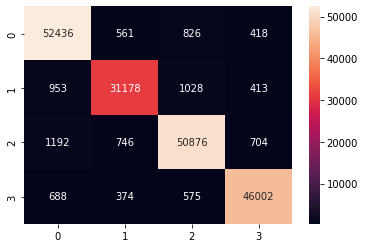

In [20]:
from sklearn.metrics import confusion_matrix

s = sns.heatmap(confusion_matrix(y_test, y_reg_pred), 
            annot=True, fmt='.0f')